# Machine Learning: Trabalho 1 - airlines_reviews

In [43]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [44]:
#carregando base de dados kaggle (https://www.kaggle.com/datasets/sujalsuthar/airlines-reviews/data)
df = pd.read_csv('/content/airlines_reviews.csv')


In [45]:
#visualizando uma amostra dos dados carregados
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [46]:
#verificando quantidade de linhas e colunas
df.shape

(8100, 17)

In [47]:
# resumo do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [48]:
# Verificando nas colunas numericas dados gerais sobre valores minimos e máximos, quartis, desvio padrão e média
df.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [49]:
# Distribuição de frequências para variáveis categóricas
df['Airline'].value_counts()
df['Type of Traveller'].value_counts()
df['Class'].value_counts()

,count
Class,
Economy Class,5504
Business Class,2104
Premium Economy,371
First Class,121


## Resumo das Avaliações de Voos

Este é um resumo estatístico de **8100 avaliações** sobre diferentes aspectos de voos:

- **Seat Comfort (Conforto do assento)**:  
  - Média: **3,41** (escala de 1 a 5)  
  - Desvio padrão: **1,39**  
  - A maioria das avaliações está entre **2 e 5**.

- **Staff Service (Atendimento da equipe)**:  
  - Média: **3,57** (escala de 1 a 5)  
  - Desvio padrão: **1,52**  
  - A maioria das avaliações está entre **2 e 5**.

- **Food & Beverages (Comida e bebidas)**:  
  - Média: **3,38** (escala de 1 a 5)  
  - Desvio padrão: **1,45**  
  - A maioria das avaliações está entre **2 e 5**.

- **Inflight Entertainment (Entretenimento a bordo)**:  
  - Média: **3,64** (escala de 1 a 5)  
  - Desvio padrão: **1,31**  
  - Avaliações geralmente entre **3 e 5**.

- **Value for Money (Custo-benefício)**:  
  - Média: **3,15** (escala de 1 a 5)  
  - Desvio padrão: **1,59**  
  - As notas variam de **1 a 5**, com mais avaliações no limite inferior.

- **Overall Rating (Classificação geral)**:  
  - Média: **5,63** (escala de 1 a 10)  
  - Desvio padrão: **3,52**  
  - A maioria das avaliações está entre **2 e 9**.


In [50]:
print(df.dtypes)

Title                     object
Name                      object
Review Date               object
Airline                   object
Verified                  object
Reviews                   object
Type of Traveller         object
Month Flown               object
Route                     object
Class                     object
Seat Comfort               int64
Staff Service              int64
Food & Beverages           int64
Inflight Entertainment     int64
Value For Money            int64
Overall Rating             int64
Recommended               object
dtype: object


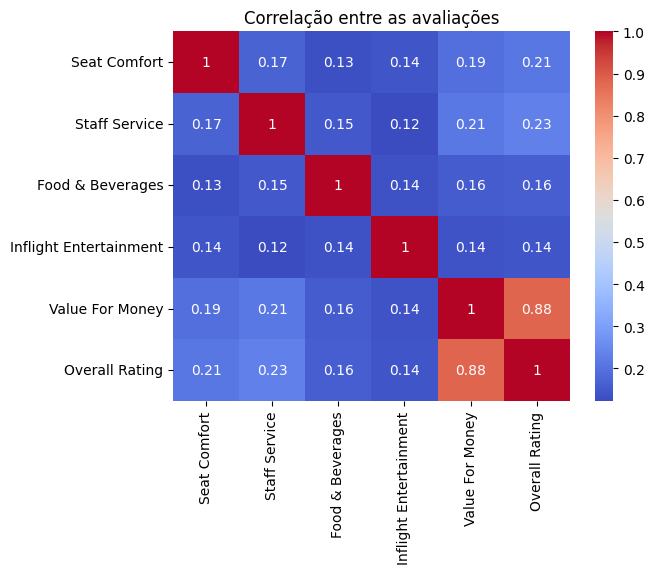

In [51]:
corr = df[['Seat Comfort', 'Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money', 'Overall Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre as avaliações')
plt.show()

Correlação com Avaliação Geral:
- Seat Comfort: Correlação de 0.21
- Staff Service: Correlação de 0.23
- Food & Beverages: Correlação de 0.16
- Inflight Entertainment: Correlação de 0.14
- Value For Money: Correlação de 0.88 (**muito alta**)

A matriz sugere que há uma correlação positiva geral entre todas as variáveis, com a “Overall Rating” (Avaliação Geral) tendo uma correlação particularmente forte com “Value For Money” (Custo-Benefício). Isso indica que os passageiros tendem a dar uma avaliação geral mais alta quando percebem que obtiveram um bom custo-benefício. Outras áreas como “Seat Comfort” e “Staff Service” também têm correlações positivas, mas não tão fortes quanto “Value For Money”.

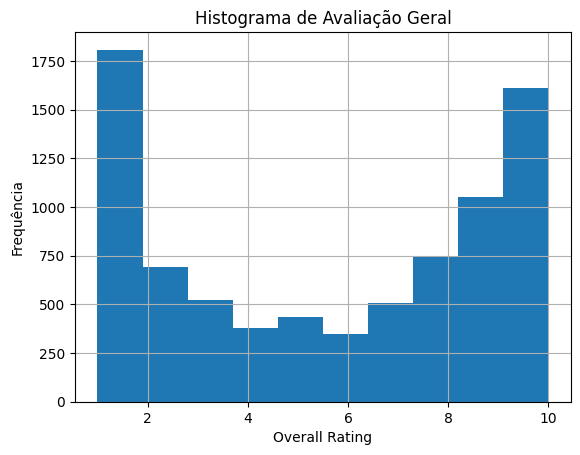

In [52]:
# histograma 'Overall Rating'
df['Overall Rating'].hist(bins=10)
plt.xlabel('Overall Rating')
plt.ylabel('Frequência')
plt.title('Histograma de Avaliação Geral')
plt.show()

## Análise
A distribuição bimodal sugere uma polarização nas avaliações. Os usuários tendem a ter opiniões muito fortes, classificando a experiência como muito ruim (1) ou excelente (10), com poucas avaliações medianas.

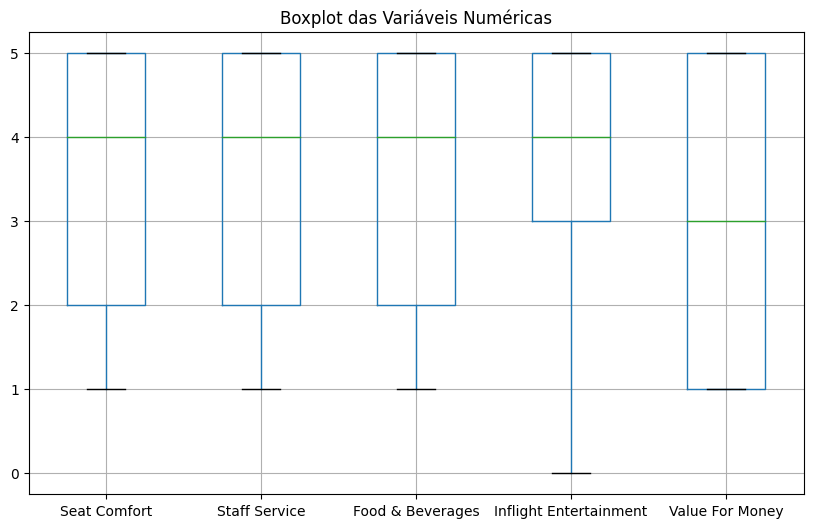

In [53]:
boxplot = df[['Seat Comfort', 'Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money']].boxplot(figsize=(10, 6))
plt.title('Boxplot das Variáveis Numéricas')
plt.show()

## Análise Geral
- **Variabilidade:** Todas as variáveis têm IQRs semelhantes, sugerindo que as percepções dos usuários são relativamente consistentes em todas as categorias avaliadas.
- **Mediana:** A maioria das variáveis têm medianas próximas de 4, indicando que a avaliação central para cada categoria é moderada.
- **Distribuição:** As whiskers mostram que as avaliações variam de 1 a 5 para todas as variáveis, indicando que há uma gama completa de percepções dos usuários, desde muito insatisfeitos até muito satisfeitos.

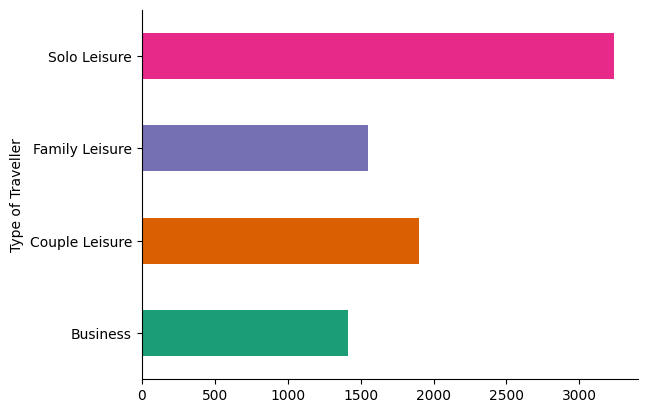

In [54]:
# Analisando a coluna Tipo de viagem
df.groupby('Type of Traveller').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

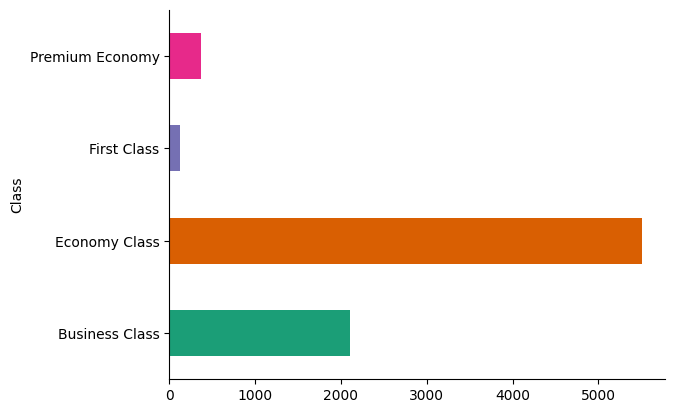

In [55]:
# Analisando as respostas por tipo de Classe
df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Verificando as avaliações


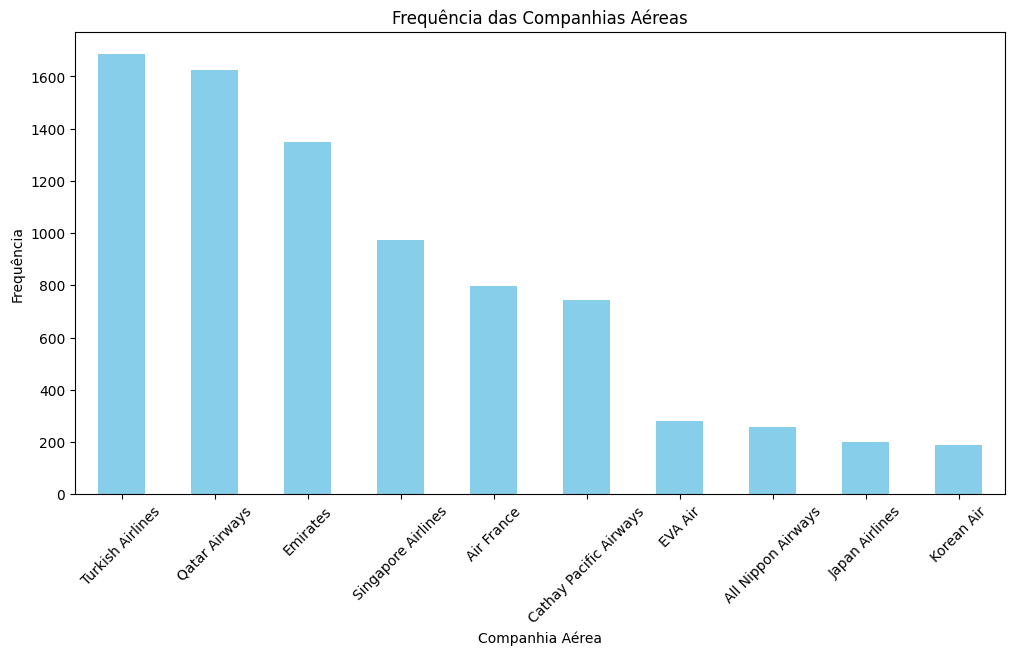

In [56]:
# Gráfico de barras para companhias aéreas
plt.figure(figsize=(12, 6))
df['Airline'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequência das Companhias Aéreas')
plt.ylabel('Frequência')
plt.xlabel('Companhia Aérea')
plt.xticks(rotation=45)
plt.show()

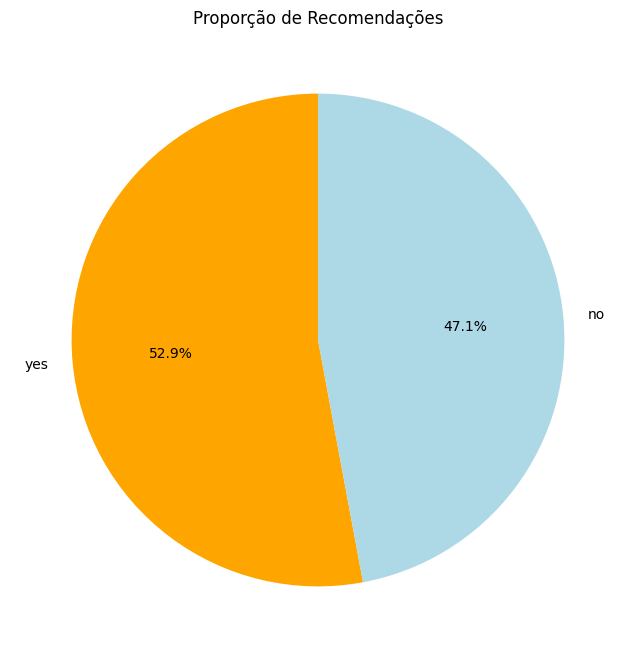

In [57]:
# Gráfico de pizza para recomendações
plt.figure(figsize=(8, 8))
df['Recommended'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=90)
plt.title('Proporção de Recomendações')
plt.ylabel('')
plt.show()

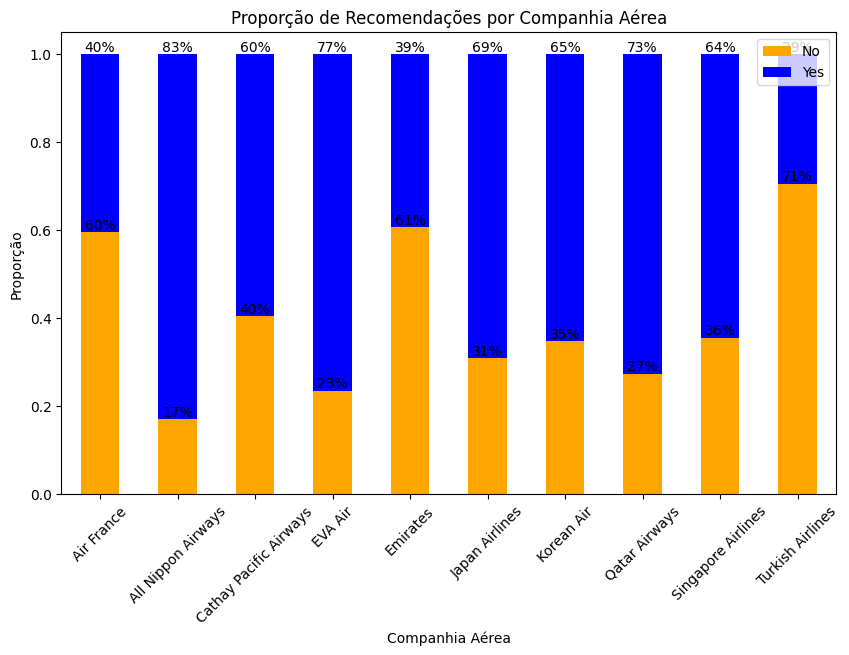

In [58]:
# Calcular total de recomendações por companhia aérea
recommendation_counts = df.groupby(['Airline', 'Recommended']).size().unstack()

# Calcular proporção de recomendações "yes" e "no"
recommendation_proportions = recommendation_counts.div(recommendation_counts.sum(axis=1), axis=0)

# Criar gráfico de barras empilhadas para visualizar as proporções
ax = recommendation_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'blue'])

# Adicionar título e rótulos
plt.title('Proporção de Recomendações por Companhia Aérea')
plt.ylabel('Proporção')
plt.xlabel('Companhia Aérea')
plt.xticks(rotation=45)
plt.legend(['No', 'Yes'])

# Exibir porcentagens nos rótulos das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2., p.get_y() + height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## **Insights**

'All Nippon Airways' e 'Cathay Pacific Airways' têm alta proporção de recomendações  e 'Turkish Airlines' maior proporção de não-recomendações.

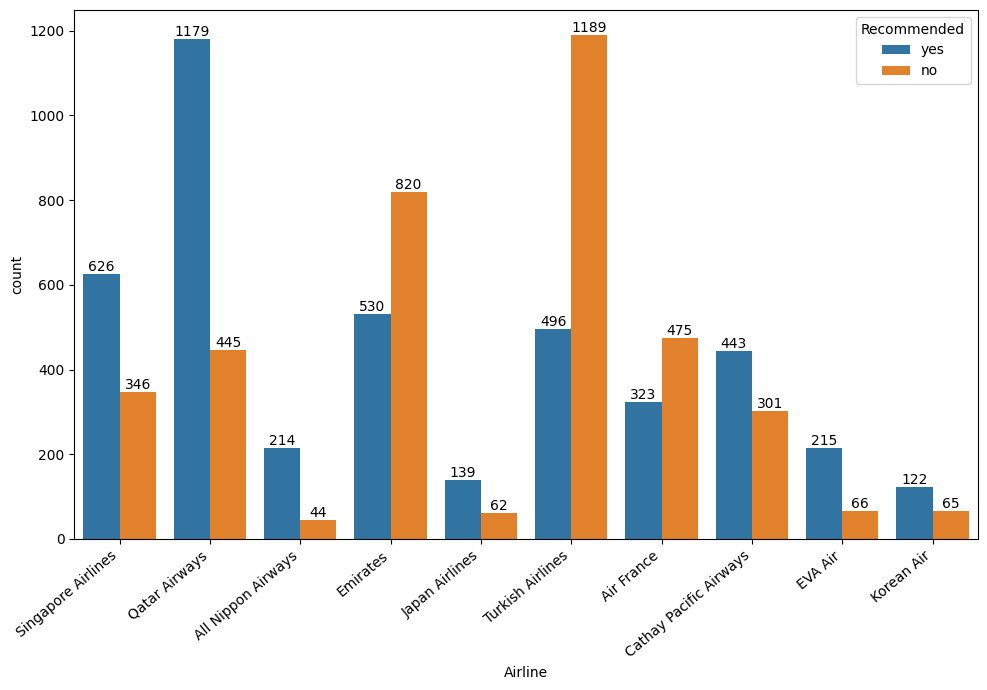

In [59]:
# Criar gráfico de contagem
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Airline', hue='Recommended', data=df)

# Adicionar rótulos às barras
for bars in ax.containers:
    ax.bar_label(bars)

# Definir rótulos e rotação para o eixo X
ax.set_xticks(range(len(ax.get_xticks())))  # Define os ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Ajustar layout
plt.tight_layout()
plt.show()

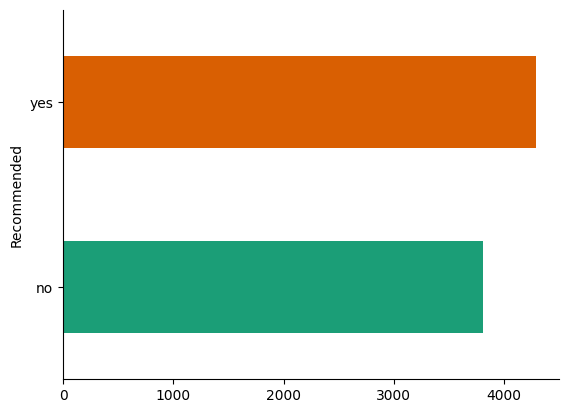

In [60]:
# total de avaliações positivas e negativas para Recommended:
df.groupby('Recommended').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Podemos notar que a maioria das companhias aéreas tem mais recomendações positivas do que negativas. Singapore Airlines e Qatar Airways destacam-se com um número particularmente alto de recomendações positivas.

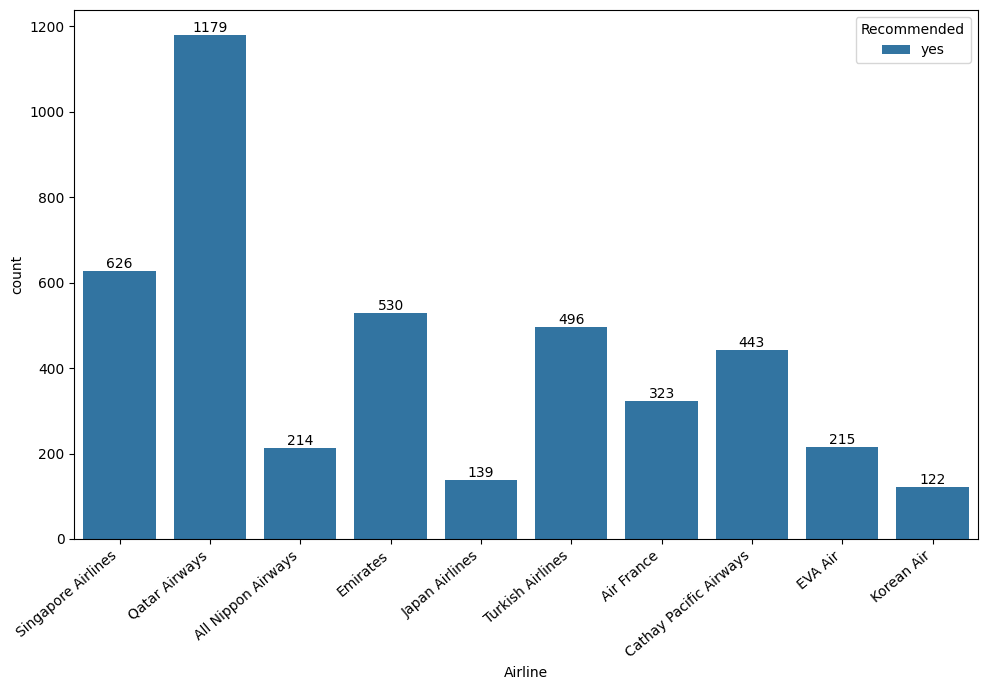

In [61]:
plt.figure(figsize=(10, 7))

# Modificando para garantir que o DataFrame está filtrado corretamente
df_yes = df.query("Recommended == 'yes'")

ax = sns.countplot(x='Airline', hue='Recommended', data=df_yes)

# Adicionando rótulos às barras
for bars in ax.containers:
    ax.bar_label(bars)

# Ajustando os rótulos do eixo x
ax.set_xticks(range(len(ax.get_xticklabels())))  # Definindo os ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

Notamos que as tres companhias aéreas com melhor avaliação (recomendado = True) são: Qatar, Singapore e Emirates. Sendo que a Qatar possui quase o dobro de recomendações positivas que as demais.

As empresa com as piores avaliações de recomendação são: korean, Japan a All Nippon, sendo que All Nippon está muito próxima da Eva Air.

In [62]:
#criando um dataset só com a avaliações recomendado = sim
df_filtered = df.query("Recommended == 'yes'")
df_filtered

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes
7,I like flying this airline,A Jabil,2024-02-19,Singapore Airlines,True,Pleasant flight which operated on time. Chec...,Family Leisure,February 2024,Singapore to Bandar Seri Begawan,Economy Class,2,5,3,4,5,10,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,aircraft was immaculate,R Shankar,2016-07-03,Korean Air,False,Flew from Kansai to Busan. Flight was delaye...,Solo Leisure,July 2016,KIX to PUS,Economy Class,4,2,3,5,5,9,yes
8095,an uneventful flight,N Vickers,2016-06-20,Korean Air,True,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,June 2016,BNE to ULN via ICN,Economy Class,5,4,5,3,4,7,yes
8096,Korean Air always impresses,Kim Holloway,2016-06-12,Korean Air,False,Our recent flight was our fourth trip to the...,Couple Leisure,June 2016,SYD to LHR via ICN,Economy Class,3,5,5,4,5,10,yes
8098,appreciated the service onboard,E Petan,2016-04-21,Korean Air,False,Seoul to Paris with Korean Air. I am traveli...,Business,April 2016,ICN to CDG,Business Class,5,1,3,4,5,10,yes


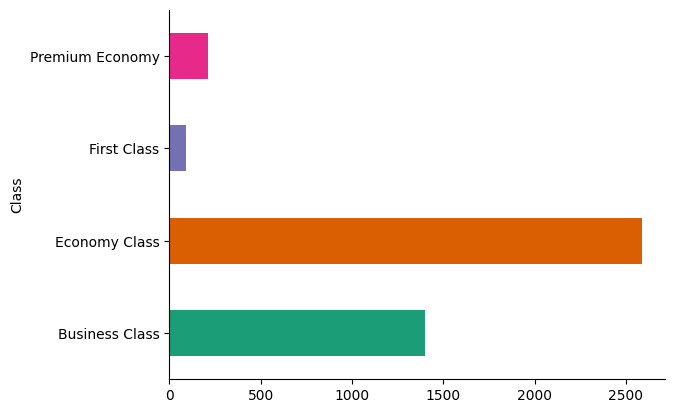

In [63]:
# Recomendado = Sim por Classe
df_filtered.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dentre os usuários que responderam Recommend = Sim, a maior parte das respostas foi de passageiros da classe economica (Economy Class).
O que acho interessante nesse gráfico é que ele pode nos levar a uma interpretação incorreta pois a classe que mais teve respostas foi a Economy Class.

A resposta para a suposta interpretação incorreta acima pode ser vista no próximo grafico que apresenta Recomendações por Classe e podemos confirmar que a classe que mais tem respostas é a Economy Class e é importante avaliar que a maior parte das respostas é negativa.

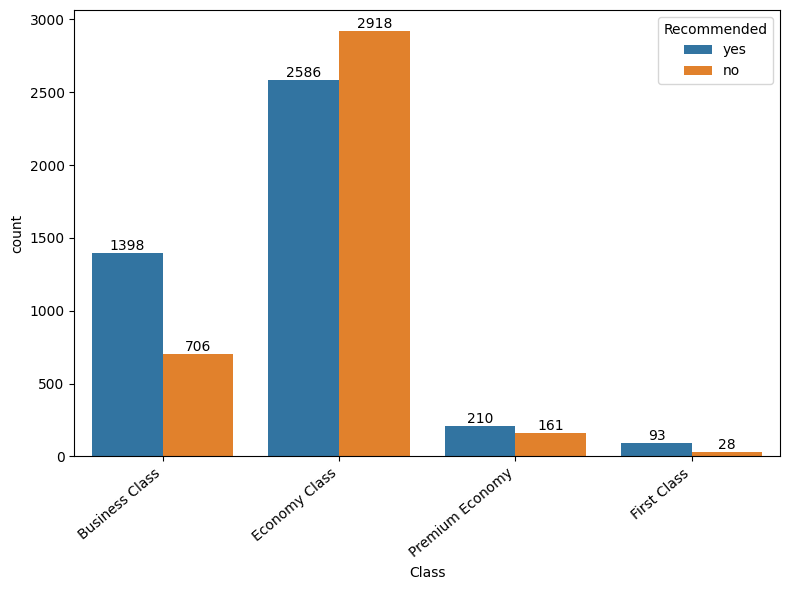

In [64]:
plt.figure(figsize=(8,6))
ax = sns.countplot( x = 'Class',hue = 'Recommended', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

**Insights**

'Economy Class' tem o maior nº de não-recomendações e 'Business Class' é bem recomendada. O que faz sentido, pois voos de classe econômica são MUITO mais baratos.

In [65]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

Review Date
2016     806
2017    1400
2018    1342
2019    1457
2020     612
2021     444
2022     916
2023     987
2024     136
Freq: Y-DEC, dtype: int64


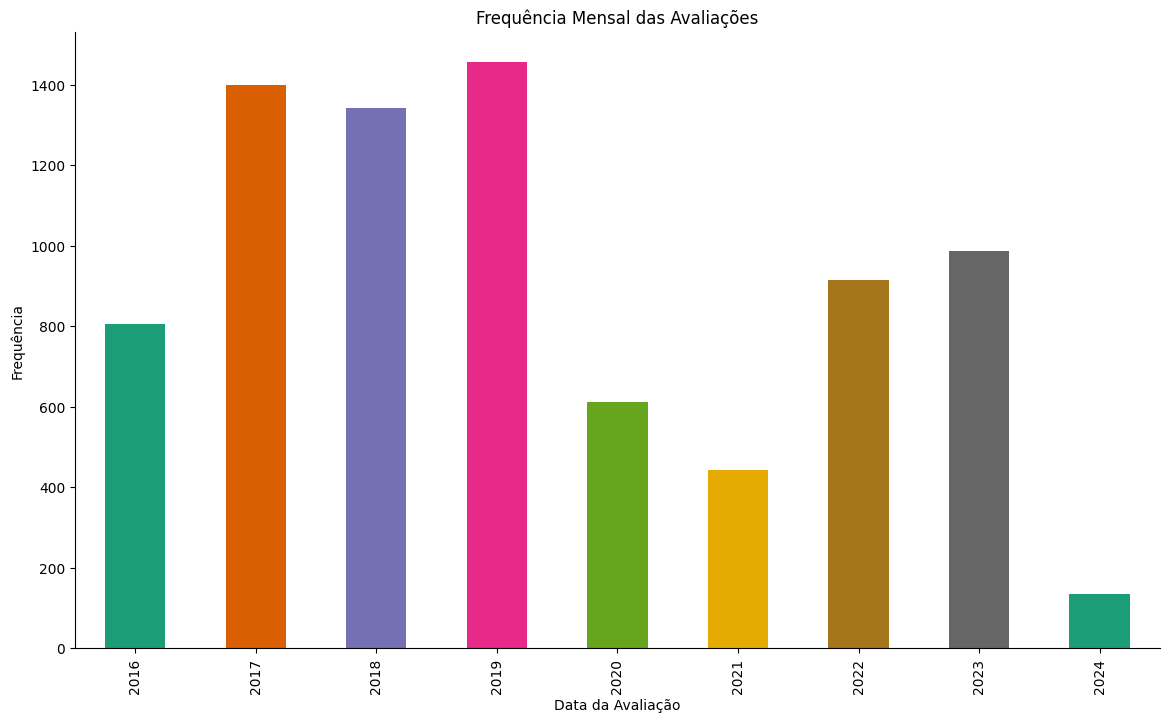

In [66]:
df['Review Date'] = pd.to_datetime(df['Review Date'], errors = 'coerce')
frequencia_ano = df.groupby(df['Review Date'].dt.to_period('Y')).size()

print(frequencia_ano)
# Plotando a frequência mensal das avaliações
plt.figure(figsize=(14, 8))
frequencia_ano.plot(kind='bar', color=sns.color_palette('Dark2'))
plt.xlabel('Data da Avaliação')
plt.ylabel('Frequência')
plt.title('Frequência Mensal das Avaliações')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

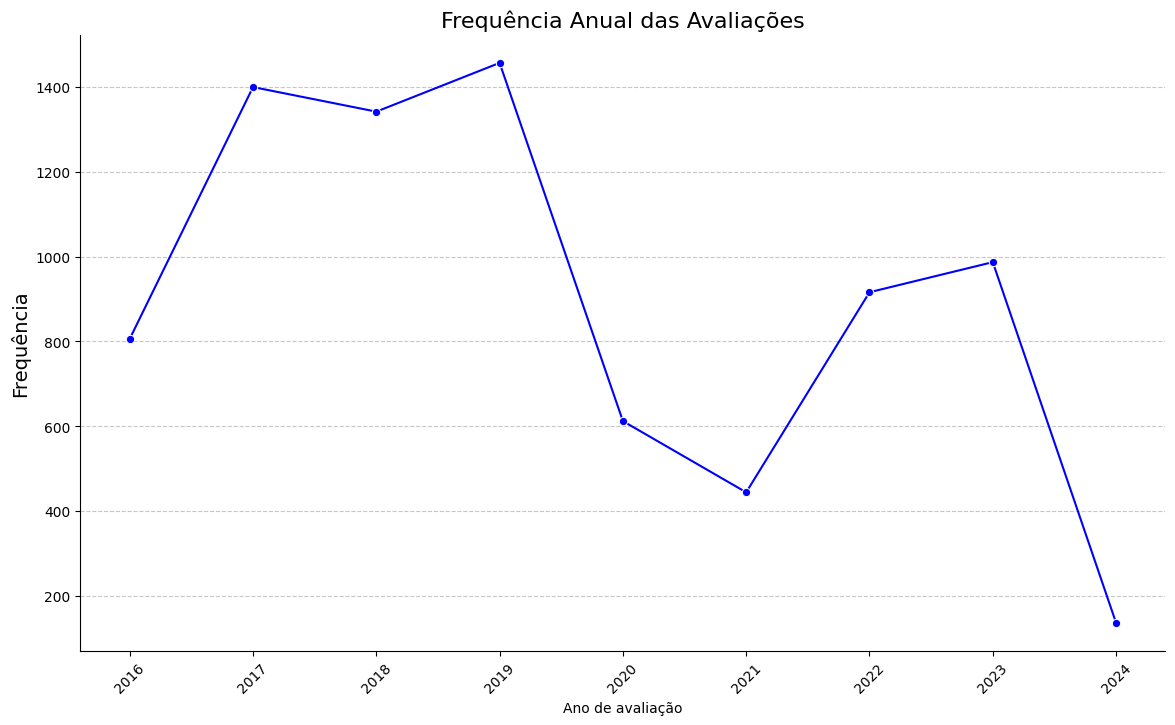

In [67]:
# Converter a coluna 'Review Date' para datetime
df['Review Date'] = pd.to_datetime(df['Review Date'])
frequencia_ano = df.groupby(df['Review Date'].dt.to_period('Y')).size()
plt.figure (figsize=(14,8))
sns.lineplot(x=frequencia_ano.index.astype(str), y=frequencia_ano.values, color='blue', marker='o')
plt.xlabel('Ano de avaliação')
plt.ylabel('Frequência', fontsize=14)
plt.title('Frequência Anual das Avaliações', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle ='--', alpha = 0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

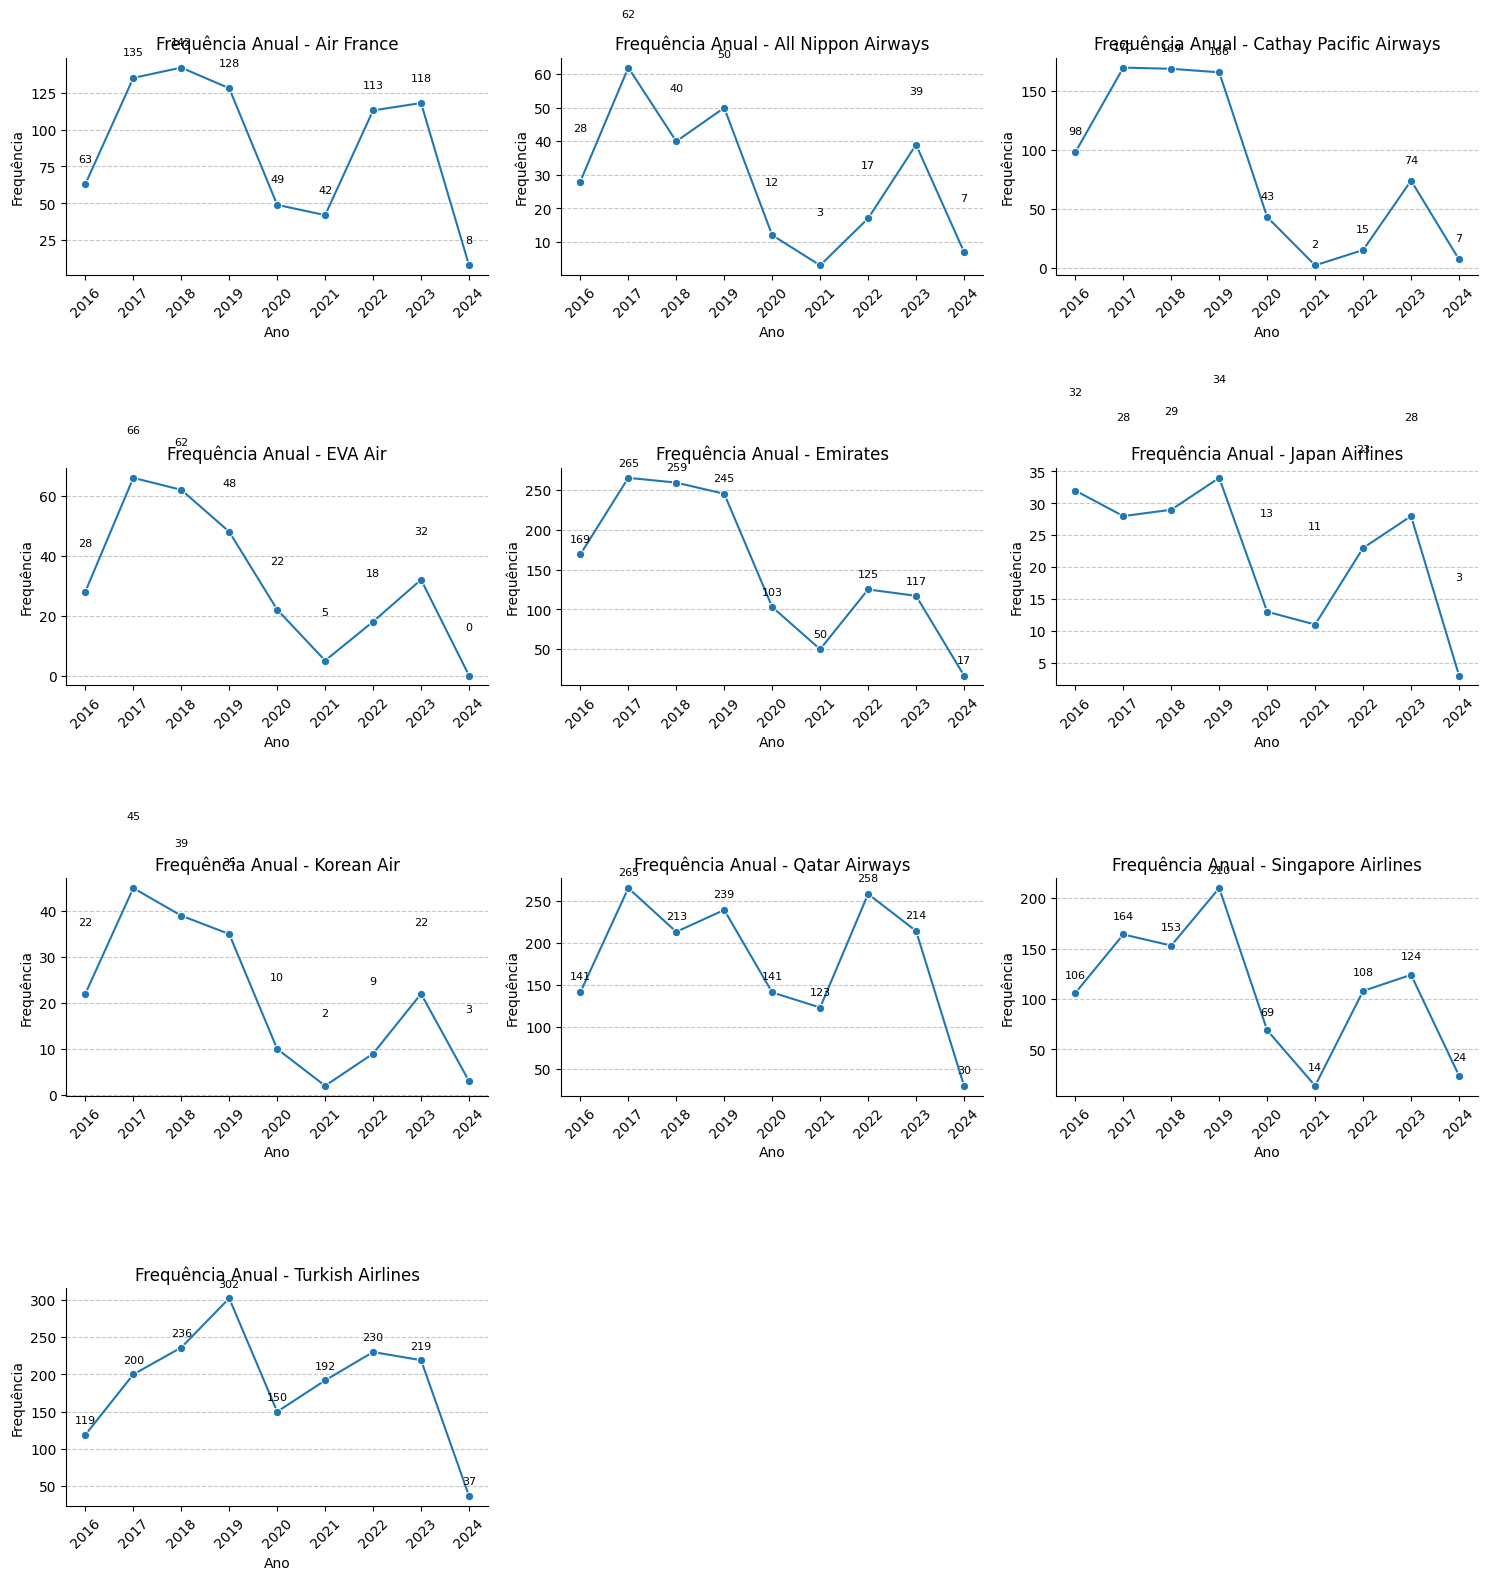

In [68]:
# Extrair o ano das avaliações
df['Year'] = df['Review Date'].dt.year

# Criar um DataFrame para armazenar as frequências anuais por companhia aérea
frequencia_ano_companhia = df.groupby(['Airline', 'Year']).size().unstack(fill_value=0)

# Definir o número de subplots em colunas
num_companhias = len(frequencia_ano_companhia.index)
num_colunas = 3  # Ajuste para o número de colunas desejadas
num_linhas = (num_companhias + num_colunas - 1) // num_colunas  # Calcula o número de linhas necessárias

plt.figure(figsize=(15, 4 * num_linhas))  # Diminuir a altura total

# Plotar um gráfico de linha para cada companhia aérea
for i, airline in enumerate(frequencia_ano_companhia.index):
    plt.subplot(num_linhas, num_colunas, i + 1)  # Criar subplots em uma grade
    sns.lineplot(x=frequencia_ano_companhia.columns, y=frequencia_ano_companhia.loc[airline], marker='o')
    plt.title(f'Frequência Anual - {airline}', fontsize=12)
    plt.xlabel('Ano', fontsize=10)
    plt.ylabel('Frequência', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().spines[['top', 'right']].set_visible(False)

    # Adicionar os números acima de cada ponto
    for x, y in zip(frequencia_ano_companhia.columns, frequencia_ano_companhia.loc[airline]):
        plt.text(x, y + 15, str(y), color='black', fontsize=8, ha='center')  # Ajustar a posição do texto

plt.tight_layout()  # Ajusta os espaçamentos entre os subplots
plt.show()

## **Insights**
Analisamos a quantidade de avaliações geral por companhia aéra e por ano para apresentar a evolução ao longo do tempo. Vale a pena observar que no período da pandemia, com a redução dos voos, o numero de avaliações cai.

**Observação**: o ultimo ano é apresentado no grafico com uma tendencia de queda, mas 2024 só possui 3 meses de avaliação.

# **Comentários finais**

Foi notado que as pessoas tendem a expressar as avaliações quando estão **MUITO** satisfeitas ou **MUITO** insatisfeitas com os serviços prestados.
As notas mais altas são geralmente quando as pessoas têm maior custo-benefício (relação 'Overall Rating' x 'Value for Money')

_______________________________________________________________

Escolha uma base de dados no https://www.kaggle.com/datasets, e se familiarize com sua base  Procure realizar a previsão (inferência) de uma variável numérica através de uma regressão linear. Se certifique que existe correlação entre as features escolhidas e o label a ser previsto,    Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).


In [69]:
df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Year
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2024
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,2024
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2024
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2024
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2024


In [70]:
!pip install vaderSentiment

# Analise de sentimento
## Faz uma clusterização dos sentimentos.
### 0 = Neutro
### 1 = Ruim
### 2 = Bom

In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analisar_sentimento(texto):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(texto)

    if scores['compound'] >= 0.05:
        return 2
    elif scores['compound'] <= -0.05:
        return 1
    else:
        return 0

reviews = []
for item in df['Reviews'].values:
    reviews.append(analisar_sentimento(item))

df['Reviews'] = reviews

# Fazendo um one hot code nas features de texto

In [104]:
columns = ["Airline", "Type of Traveller","Class", "Recommended"]
df_dummies = pd.get_dummies(df[columns], drop_first=True)
df_editado = pd.concat([df, df_dummies], axis=1)
df_editado.drop(columns=columns, inplace=True)

In [107]:
df_ML = df_editado.drop(columns = ['Title',	'Name',	'Review Date', 'Verified',	'Month Flown', 'Route'])
df_ML.head()

,Reviews,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Year,Airline_All Nippon Airways,Airline_Cathay Pacific Airways,...,Airline_Qatar Airways,Airline_Singapore Airlines,Airline_Turkish Airlines,Type of Traveller_Couple Leisure,Type of Traveller_Family Leisure,Type of Traveller_Solo Leisure,Class_Economy Class,Class_First Class,Class_Premium Economy,Recommended_yes
0,2,4,4,4,4,4,9,2024,False,False,...,False,True,False,False,False,True,False,False,False,True
1,1,5,3,4,4,1,3,2024,False,False,...,False,True,False,False,False,True,True,False,False,False
2,2,1,5,2,1,5,10,2024,False,False,...,False,True,False,False,True,False,True,False,False,True
3,2,5,5,5,5,5,10,2024,False,False,...,False,True,False,False,False,True,True,False,False,True
4,2,5,5,5,5,5,10,2024,False,False,...,False,True,False,False,True,False,True,False,False,True


# Verificando a correlação entre as colunas


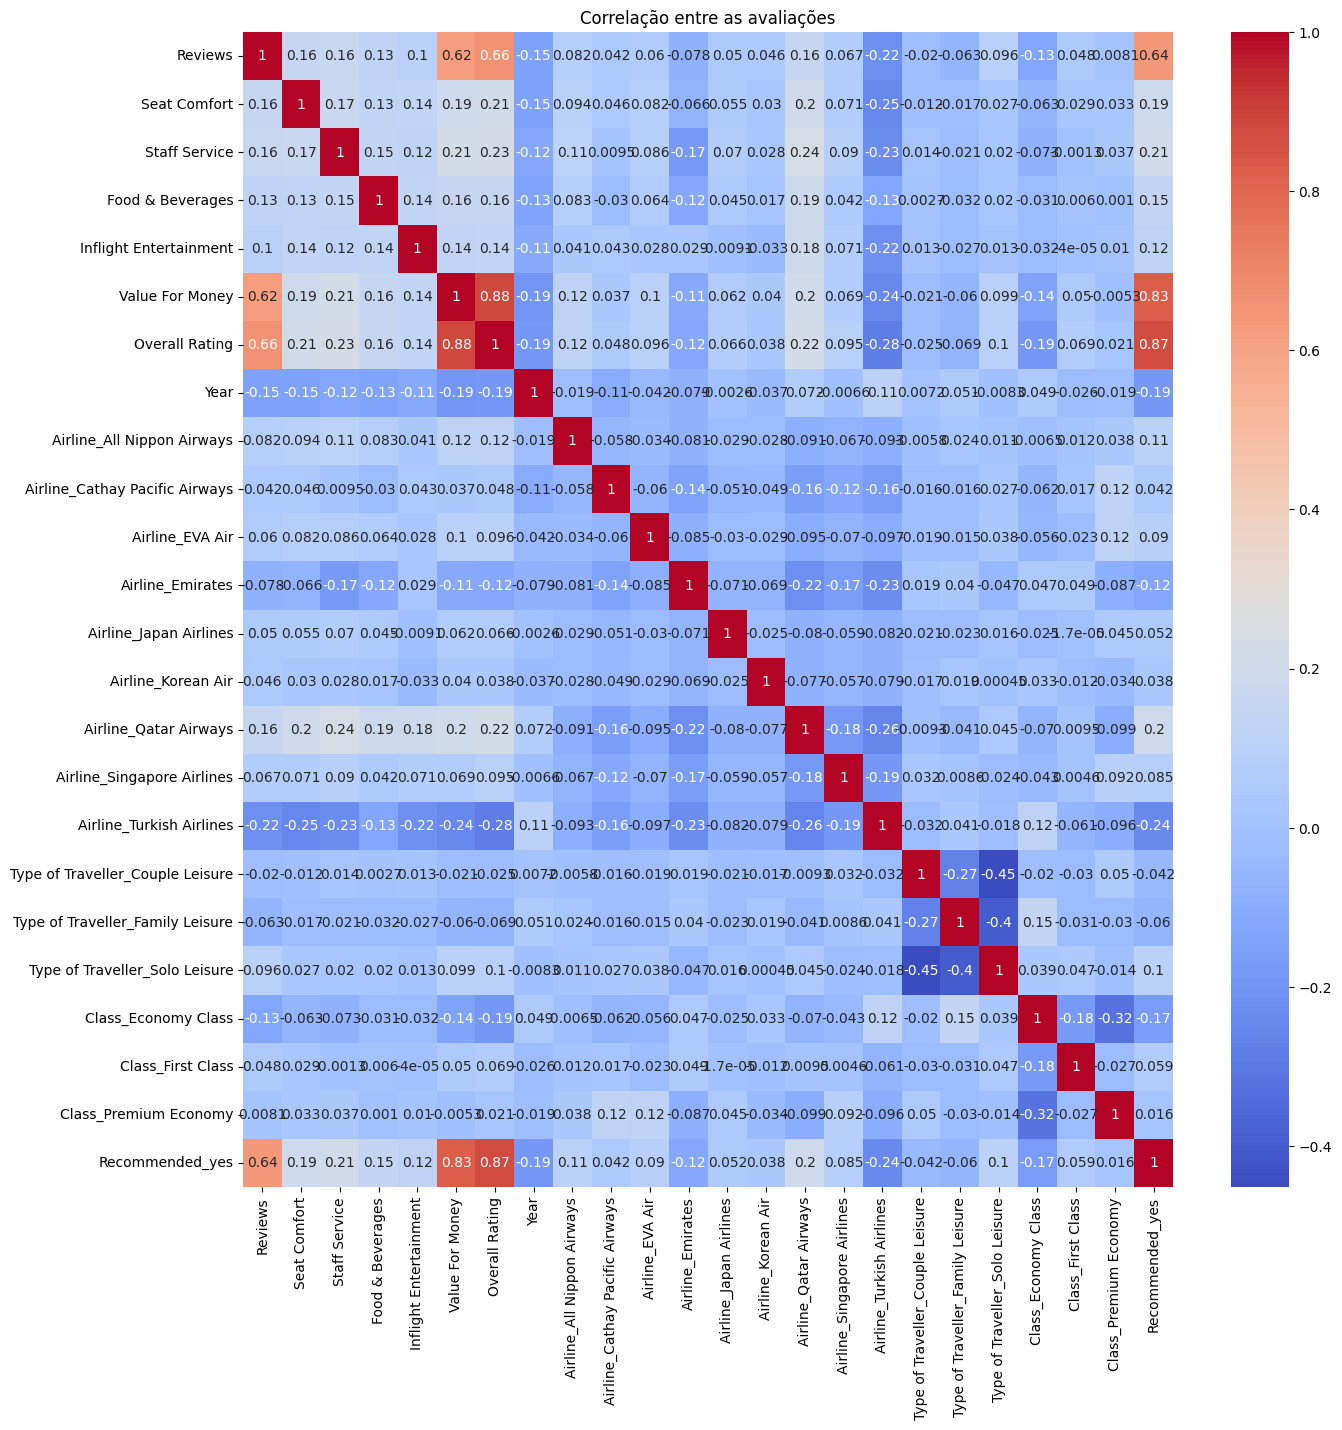

In [110]:
plt.figure(figsize=(15,15))
sns.heatmap(df_ML.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as avaliações')
plt.show()

# Analise para correlação
Pode-se concluir que a Overall Rating (feature targert) tem algumas features correlacionas.

# Importando bibliotecas

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Criando função que olha para correlação para selicionar as features

In [117]:
def corr_model(X, y, corr_threshold=0.60):
    # Concatena X e y temporariamente para calcular a correlação
    df_temp = pd.concat([X, y], axis=1)

    # Calcula a correlação entre cada coluna de X e y
    corr_matrix = df_temp.corr()
    target_column = y.name  # Obtém o nome da variável dependente

    # Seleciona as colunas de X que têm correlação maior que corr_threshold ou menor que -corr_threshold com y
    corr_target = corr_matrix[target_column]
    selected_columns = corr_target[(corr_target > corr_threshold) | (corr_target < -corr_threshold)].index.tolist()

    # Remove a coluna alvo (y) da lista se ela estiver presente
    if target_column in selected_columns:
        selected_columns.remove(target_column)

    # Exibe as colunas selecionadas
    print(f"Colunas selecionadas com correlação acima de {corr_threshold} ou abaixo de {-corr_threshold}: {selected_columns}")

    # Divide os dados de X correspondentes às colunas selecionadas e y
    X_selected = X[selected_columns]

    # Divide os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Cria e treina o modelo de Regressão Linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Faz previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcula o MSE e o R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Exibe os resultados
    print(f"MSE: {mse}")
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"R²: {r2}")


In [118]:
X = df_ML.drop('Overall Rating', axis = 1)
y = df_ML['Overall Rating']

In [119]:
corr_model(X,y) # Correlação Maior que 0.6 e Menor que -0.6

Colunas selecionadas com correlação acima de 0.6 ou abaixo de -0.6: ['Reviews', 'Value For Money', 'Recommended_yes']
MSE: 1.6319538021588407
RMSE: 1.2774794723042875
R²: 0.8645181789555432


Selecionar apenas as colunas com correlações mais fortes (acima de 0.6 ou abaixo de -0.6) resultou em um modelo bastante preciso, com um R² de aproximadamente 86.5%, indicando que essas variáveis explicam 86.5% da variação da variável dependente.
O MSE de 1.63 e o RMSE de 1.28 mostram que o erro médio quadrático e o erro padrão são relativamente baixos, o que significa que o modelo está se ajustando bem aos dados com essas variáveis.

In [121]:
corr_model(X,y,0.2) # Correlação Maior que 0.2 e Menor que -0.2

Colunas selecionadas com correlação acima de 0.2 ou abaixo de -0.2: ['Reviews', 'Seat Comfort', 'Staff Service', 'Value For Money', 'Airline_Qatar Airways', 'Airline_Turkish Airlines', 'Recommended_yes']
MSE: 1.5910688755194202
RMSE: 1.2613757867976618
R²: 0.8679123708175004


Ao relaxar o limite de correlação (acima de 0.2 ou abaixo de -0.2), mais colunas foram incluídas no modelo. Isso resultou em um R² ligeiramente superior, 86.8%, o que significa que o modelo com mais colunas explica uma proporção um pouco maior da variabilidade.
O MSE de 1.59 e o RMSE de 1.26 são levemente melhores em relação ao primeiro conjunto, mostrando que o erro foi marginalmente reduzido ao adicionar mais variáveis, mas a diferença não é significativa.

In [122]:
corr_model(X,y,0.05) # Correlação Maior que 0.05 e Menor que -0.05

Colunas selecionadas com correlação acima de 0.05 ou abaixo de -0.05: ['Reviews', 'Seat Comfort', 'Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money', 'Year', 'Airline_All Nippon Airways', 'Airline_EVA Air', 'Airline_Emirates', 'Airline_Japan Airlines', 'Airline_Qatar Airways', 'Airline_Singapore Airlines', 'Airline_Turkish Airlines', 'Type of Traveller_Family Leisure', 'Type of Traveller_Solo Leisure', 'Class_Economy Class', 'Class_First Class', 'Recommended_yes']
MSE: 1.5857360470916488
RMSE: 1.2592601189157262
R²: 0.8683550924838591


A inclusão de mais variáveis com correlação menor que 0.6 ou 0.2 resultou em um leve aumento na complexidade do modelo, ao adicionar mais colunas relacionadas a características detalhadas de serviços, companhias aéreas e tipos de viajantes.
O desempenho melhorou muito pouco em termos de MSE e RMSE, e o R² aumentou marginalmente para 86.8% em comparação aos modelos com limiares de correlação mais altos.

# Conclusão FINAL
Ambos os modelos são viáveis, mas o modelo com limiar de 0.6 apresenta um bom equilíbrio entre simplicidade e complexidade.

Simplicidade x Complexidade: Apesar do ligeiro aumento no desempenho, o modelo com limiar de 0.6 ainda oferece uma boa relação entre simplicidade e desempenho. Utilizando menos variáveis, ele é quase tão eficaz quanto o modelo com mais variáveis (0.05), sendo mais fácil de interpretar e provavelmente mais robusto.